# Grover's Search Algorithm

Grover’s Search Algorithm is one of the most well-known quantum algorithms, offering a quadratic speedup over classical search algorithms for unstructured databases. It was developed by Lov Grover in 1996 and demonstrates how quantum algorithms can significantly outperform classical algorithms in certain tasks.

### Problem Overview:
 - Unstructured Database Search: Suppose you have an unstructured database of N items and you want to find a specific item.

 - In classical search algorithms, you would need to check each item one by one, and on average, you would expect to make N/2 queries to find the item.

 - In the worst case, you would have to check all N items. This leads to a time complexity of O(N).

 - Grover’s Algorithm solves the same problem with only O(N) queries, providing a quadratic speedup compared to the classical approach.

### Steps in Grover's Algorithm:
1. Initialization:

    - Prepare the initial state as an equal superposition of all basis states.
    - This is done by applying Hadamard gates to each qubit in the register.
2. Oracle Application:

    - Apply the oracle to mark the correct item by flipping the amplitude of the corresponding state.
3. Grover Diffusion:

    - Apply the Grover diffusion operator to amplify the amplitude of the correct state.
4. Repeat:

    - Repeat the oracle and diffusion operations O(N) times to maximize the probability of measuring the correct item.
5. Measurement:

    - Measure the quantum state to find the correct item with high probability.

### Time Complexity:
 - Classical Search: O(N) operations.
 - Grover’s Search: O(N) operations.
This quadratic speedup makes Grover’s algorithm significantly faster than any classical algorithm for unstructured search, especially when N is large.

### Advantages and Limitations:
 - Advantages: Grover’s algorithm offers a quadratic speedup over classical search algorithms, making it more efficient for large databases.
 - Limitations: It only provides a quadratic speedup, not an exponential one. Furthermore, Grover’s algorithm requires a precisely defined oracle, which may be challenging to implement for certain real-world problems.

### Implementation:

We’ll use Qiskit to build a quantum circuit that implements Grover's algorithm for a small search space (e.g., 4 items).

Counts: {'11': 1024}


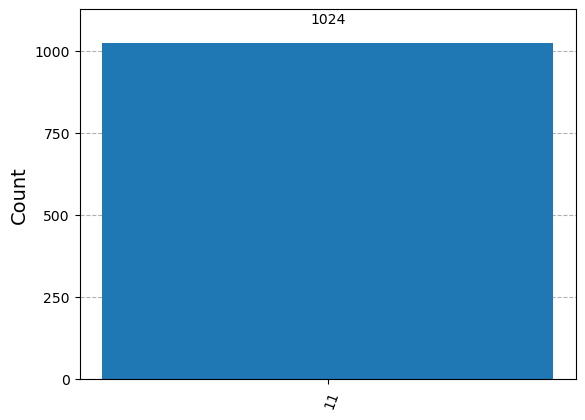

In [7]:
# Import necessary modules
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Step 1: Define the Oracle for Grover's Algorithm
def grover_oracle(n_qubits, marked_state):
    """
    Create an oracle that flips the phase of the marked_state.
    n_qubits: Number of qubits
    marked_state: The bitstring of the state to mark (e.g., '11' for |11>)
    """
    oracle = QuantumCircuit(n_qubits)
    
    # Mark the target state by flipping its phase
    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            oracle.x(i)
    
    oracle.h(n_qubits - 1)
    oracle.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Controlled-Z gate (multi-controlled)
    oracle.h(n_qubits - 1)
    
    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            oracle.x(i)
    
    oracle.name = "Oracle"
    return oracle

# Step 2: Define the Diffusion Operator
def diffusion_operator(n_qubits):
    """
    Create the Grover diffusion operator (inversion about the mean).
    """
    diffusion = QuantumCircuit(n_qubits)
    
    # Apply Hadamard to all qubits
    diffusion.h(range(n_qubits))
    
    # Apply X gates to all qubits
    diffusion.x(range(n_qubits))
    
    # Apply multi-controlled Z gate
    diffusion.h(n_qubits - 1)
    diffusion.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled Z gate
    diffusion.h(n_qubits - 1)
    
    # Apply X gates to all qubits
    diffusion.x(range(n_qubits))
    
    # Apply Hadamard to all qubits
    diffusion.h(range(n_qubits))
    
    diffusion.name = "Diffusion"
    return diffusion

# Step 3: Implement Grover's Search Algorithm
def grovers_search(n_qubits, marked_state, num_iterations):
    """
    Implement Grover's algorithm with the specified number of iterations.
    n_qubits: Number of qubits
    marked_state: The bitstring of the marked state
    num_iterations: Number of Grover iterations to perform
    """
    # Create a quantum circuit with n_qubits
    grover_circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Step 1: Initialize the qubits in superposition using Hadamard gates
    grover_circuit.h(range(n_qubits))
    
    # Step 2: Apply Grover's algorithm for the specified number of iterations
    for _ in range(num_iterations):
        # Apply the oracle
        oracle = grover_oracle(n_qubits, marked_state)
        grover_circuit.append(oracle, range(n_qubits))
        
        # Apply the diffusion operator
        diffusion = diffusion_operator(n_qubits)
        grover_circuit.append(diffusion, range(n_qubits))
    
    # Step 3: Measure the result
    grover_circuit.measure(range(n_qubits), range(n_qubits))
    
    return grover_circuit

# Step 4: Execute Grover's Algorithm
def run_grovers_search(n_qubits, marked_state, num_iterations):
    """
    Run Grover's search algorithm and display the results.
    n_qubits: Number of qubits
    marked_state: The bitstring of the marked state
    num_iterations: Number of Grover iterations to perform
    """
    # Create the Grover circuit
    grover_circuit = grovers_search(n_qubits, marked_state, num_iterations)
    
    # Use Aer's qasm_simulator
    simulator = AerSimulator()
    
    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(grover_circuit, simulator)
    
    # Execute the circuit on the simulator
    result = simulator.run(transpiled_circuit, backend=simulator, shots=1024).result()
    
    # Get the counts (how many times each state was measured)
    counts = result.get_counts(grover_circuit)
    
    return counts

# Example Usage:
n_qubits = 2  # For a small database with 4 items
marked_state = '11'  # We want to find the state |11>
num_iterations = 1  # One iteration of Grover's algorithm

# Run Grover's Search
counts = run_grovers_search(n_qubits, marked_state, num_iterations)

# Plot the results
print(f"Counts: {counts}")
plot_histogram(counts)

### Conclusion

- The output shows that Grover's algorithm successfully amplified the probability of the marked state ∣11⟩, so that when we measure the qubits, we observe the state '11' every single time.
- Since all 1024 shots resulted in the state '11', it means the algorithm correctly identified the marked state with 100% probability.

## Real-World Application: Searching for a Specific Pattern in Binary Data

In this example, we'll imagine we have a database of binary data representing files or records, and we want to search for a specific pattern in this binary data. Classical algorithms would require examining each record one by one, but Grover’s algorithm allows us to search the database faster.

#### Problem Setup:
- Binary Data: We'll assume our data is represented as binary strings, e.g., '0101', '1100', '0110', etc.
- Target Pattern: We will define a target pattern that we are searching for, e.g., '1100'.
- Database Representation: In this case, we’ll encode each binary string into a quantum state and use Grover’s algorithm to amplify the amplitude of the state that corresponds to the target pattern.

There are 16 possible 4-bit strings, so we will use 4 qubits to represent the data.

#### Implementation: 

Counts: {'1100': 948, '1111': 2, '0110': 8, '1011': 6, '0100': 6, '0000': 8, '0111': 4, '0101': 3, '1010': 12, '0010': 6, '1000': 6, '0011': 4, '0001': 7, '1110': 2, '1001': 1, '1101': 1}


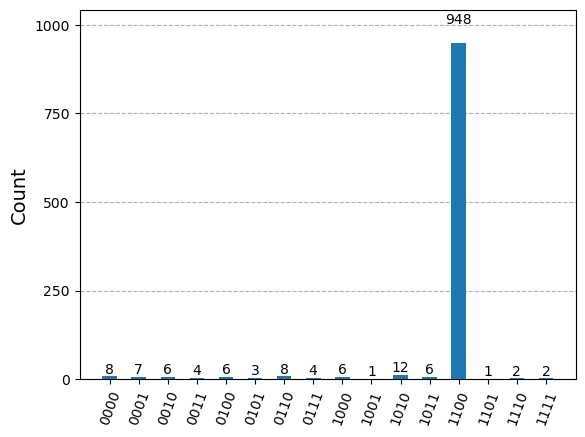

In [6]:
# Import necessary modules
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# Step 1: Define the Oracle for Grover's Algorithm
def grover_oracle(n_qubits, marked_state):
    """
    Create an oracle that flips the phase of the marked_state.
    n_qubits: Number of qubits
    marked_state: The bitstring of the state to mark (e.g., '1100' for |1100>)
    """
    oracle = QuantumCircuit(n_qubits)
    
    # Mark the target state by flipping its phase
    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            oracle.x(i)
    
    oracle.h(n_qubits - 1)
    oracle.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled X
    oracle.h(n_qubits - 1)
    
    for i, bit in enumerate(reversed(marked_state)):
        if bit == '0':
            oracle.x(i)
    
    oracle.name = "Oracle"
    return oracle

# Step 2: Define the Diffusion Operator
def diffusion_operator(n_qubits):
    """
    Create the Grover diffusion operator (inversion about the mean).
    """
    diffusion = QuantumCircuit(n_qubits)
    
    # Apply Hadamard to all qubits
    diffusion.h(range(n_qubits))
    
    # Apply X gates to all qubits
    diffusion.x(range(n_qubits))
    
    # Apply multi-controlled Z gate
    diffusion.h(n_qubits - 1)
    diffusion.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled X
    diffusion.h(n_qubits - 1)
    
    # Apply X gates to all qubits
    diffusion.x(range(n_qubits))
    
    # Apply Hadamard to all qubits
    diffusion.h(range(n_qubits))
    
    diffusion.name = "Diffusion"
    return diffusion

# Step 3: Implement Grover's Search Algorithm
def grovers_search(n_qubits, marked_state, num_iterations):
    """
    Implement Grover's algorithm with the specified number of iterations.
    n_qubits: Number of qubits
    marked_state: The bitstring of the marked state
    num_iterations: Number of Grover iterations to perform
    """
    # Create a quantum circuit with n_qubits
    grover_circuit = QuantumCircuit(n_qubits, n_qubits)
    
    # Step 1: Initialize the qubits in superposition using Hadamard gates
    grover_circuit.h(range(n_qubits))
    
    # Step 2: Apply Grover's algorithm for the specified number of iterations
    for _ in range(num_iterations):
        # Apply the oracle
        oracle = grover_oracle(n_qubits, marked_state)
        grover_circuit.append(oracle, range(n_qubits))
        
        # Apply the diffusion operator
        diffusion = diffusion_operator(n_qubits)
        grover_circuit.append(diffusion, range(n_qubits))
    
    # Step 3: Measure the result
    grover_circuit.measure(range(n_qubits), range(n_qubits))
    
    return grover_circuit

# Step 4: Execute Grover's Algorithm
def run_grovers_search(n_qubits, marked_state, num_iterations):
    """
    Run Grover's search algorithm and display the results.
    n_qubits: Number of qubits
    marked_state: The bitstring of the marked state
    num_iterations: Number of Grover iterations to perform
    """
    # Create the Grover circuit
    grover_circuit = grovers_search(n_qubits, marked_state, num_iterations)
    
    # Use Aer's qasm_simulator
    simulator = AerSimulator()
    
    # Transpile the circuit for the simulator
    transpiled_circuit = transpile(grover_circuit, simulator)
    
    # Execute the circuit on the simulator
    result = simulator.run(transpiled_circuit, shots=1024).result()
    
    # Get the counts (how many times each state was measured)
    counts = result.get_counts(grover_circuit)
    return counts

# Example Usage:
n_qubits = 4  # For a 16-item database (2^4 = 16)
marked_state = '1100'  # We want to find the state |1100>
num_iterations = 2  # Number of Grover iterations (optimal for 4 qubits is ~2)

# Run Grover's Search
counts = run_grovers_search(n_qubits, marked_state, num_iterations)

# Plot the results
print(f"Counts: {counts}")
plot_histogram(counts)


This implementation demonstrates how Grover’s search can be applied to a real-world problem of pattern matching in binary data, providing quantum speedup for unstructured search problems. Let me know if you'd like to dive deeper into more complex or larger datasets!